In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import gmaps
from api_keys import g_key
from ipywidgets.embed import embed_minimal_html

In [2]:
#Data sets
#toronto police data
toronto_collision= pd.read_csv('Resources/Fatal_Collisions_toronto.csv')
#Toronto census data
toronto_income= pd.read_csv('Resources/income_toronto.csv')

In [3]:
# toronto_collision.columns
# toronto_income.columns

In [4]:
# Clean column layouts
toronto_income=toronto_income.rename(columns={'Population, 2016':'Population','Median Household Income Before Taxes':'Median Income'})

toronto_collision=toronto_collision[['X', 'Y', 'District','Neighbourhood','FATAL_NO','YEAR', 'VEHTYPE','DATE', 'Hour']]
toronto_collision=toronto_collision.rename(columns={'X':'Longitude',
                                                    'Y':'Latitude',
                                                    'YEAR':'Year',
                                                    'FATAL_NO':'Number of Fatalities',
                                                    'VEHTYPE':'Vehicle Type',
                                                    'DATE':'Date', 
                                                    })

In [5]:
#toronto_collision.head()
#toronto_income.head()

In [6]:
# toronto_collision.Neighbourhood.nunique()
# toronto_income.Neighbourhood.nunique()

In [7]:
toronto_data=pd.merge(toronto_collision,toronto_income, how='outer',on='Neighbourhood')
toronto_data=toronto_data.dropna()
toronto_data.head()

,Longitude,Latitude,District,Neighbourhood,Number of Fatalities,Year,Vehicle Type,Date,Hour,Median Income,Population
0,-79.227590,43.816245,Scarborough,Agincourt/Malvern,2.0,2012.0,Other,2012-01-12T05:00:00.000Z,5.0,68108.0,96664.0
1,-79.263774,43.801421,Scarborough,Agincourt/Malvern,57.0,2015.0,,2015-11-24T05:00:00.000Z,6.0,68108.0,96664.0
2,-79.200870,43.805159,Scarborough,Agincourt/Malvern,49.0,2015.0,"Automobile, Station Wagon",2015-10-06T04:00:00.000Z,6.0,68108.0,96664.0
3,-79.224290,43.816945,Scarborough,Agincourt/Malvern,36.0,2009.0,Other,2009-10-23T04:00:00.000Z,7.0,68108.0,96664.0
4,-79.289455,43.785750,Scarborough,Agincourt/Malvern,24.0,2014.0,,2014-08-16T04:00:00.000Z,5.0,68108.0,96664.0


In [8]:
# save Cleaned Data Frame
toronto_data.to_csv('Output/toronto_cleaned.csv')

 p-value is 4.136528557707383e-59; Normally distributed


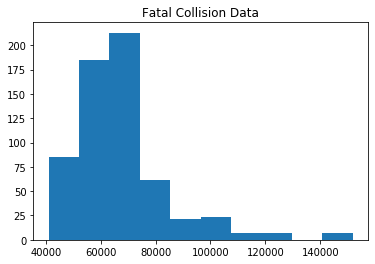

In [9]:
# Histogram for data collected for median income
plt.hist(toronto_data['Median Income'])
plt.title('Fatal Collision Data')
plt.savefig('Output/income_hist.png')
# More collisions in midrange income brackets (normally distributed)
p_value=sts.normaltest(toronto_data['Median Income']) 
print(f' p-value is {p_value[1]}; Normally distributed')

In [10]:
#place nighbourhood and income data into lists
neighbourhoods=list(toronto_data.Neighbourhood.unique())
income=list(toronto_data['Median Income'].unique())
print(len(income))
print(len(neighbourhoods))

100
100


In [11]:
#Create dataframe to hold collisions in each neighbourhood (#Group by neighbourhoods)
hood_collisions=pd.DataFrame(toronto_data.groupby('Neighbourhood')['District'].count())
hood_collisions=hood_collisions.rename(columns={
    'District':'Number of Collisions'})

hood_income=pd.DataFrame(toronto_data.groupby('Neighbourhood')['Median Income'].min())

hood_data=pd.merge(hood_collisions,hood_income, on='Neighbourhood')
hood_data=hood_data.sort_values('Median Income',ascending=False)
hood_data

,Number of Collisions,Median Income
Neighbourhood,,
Lawrence Park South,4,151885.0
Kingsway South,1,151552.0
Lawrence Park North,2,144963.0
Leaside-Bennington,4,126930.0
Forest Hill South,3,119484.0
...,...,...
Flemingdon Park,7,48917.0
Bay Street Corridor,6,48737.0
Weston,2,45696.0


In [12]:
location_first=toronto_data.groupby('Neighbourhood').first()
location_first=location_first[['Latitude','Longitude','District','Population']]

In [13]:
#merge to final table
toronto_hood_data=pd.merge(hood_data,location_first,left_index=True, right_index=True )
# toronto_hood_data=pd.merge(toronto_hood_data, toronto_population, on=index)
toronto_hood_data['City']='Toronto'
toronto_hood_data=toronto_hood_data[['Number of Collisions','Median Income','District','Population','City']]
toronto_hood_data

,Number of Collisions,Median Income,District,Population,City
Neighbourhood,,,,,
Lawrence Park South,4,151885.0,North York,16828.0,Toronto
Kingsway South,1,151552.0,Etobicoke York,9271.0,Toronto
Lawrence Park North,2,144963.0,North York,15179.0,Toronto
Leaside-Bennington,4,126930.0,Toronto and East York,10084.0,Toronto
Forest Hill South,3,119484.0,Toronto and East York,10732.0,Toronto
...,...,...,...,...,...
Flemingdon Park,7,48917.0,Scarborough,43041.0,Toronto
Bay Street Corridor,6,48737.0,Toronto and East York,43466.0,Toronto
Weston,2,45696.0,Etobicoke York,29090.0,Toronto


In [14]:
# Save Final table
toronto_hood_data.to_csv('Output/toronto_table.csv')

In [15]:
#Dependent varaible is collisions (y)
x_axis=toronto_hood_data['Median Income']
y_axis=toronto_hood_data['Number of Collisions']
population_size=toronto_hood_data['Population']

The correlation coefficient is: -0.165


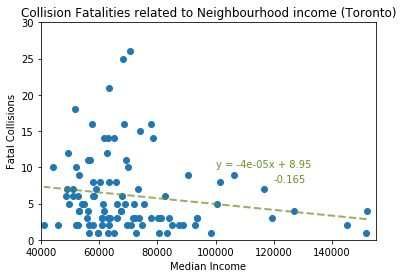

In [16]:
plt.scatter(x_axis,y_axis)
plt.title('Collision Fatalities related to Neighbourhood income (Toronto)')
plt.xlabel('Median Income')
plt.ylabel('Fatal Collisions')
plt.xlim(40000,155000)
plt.ylim(0,30)

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_axis,y_axis)
rvalue=round(rvalue,5)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))

best_fit = slope * x_axis + intercept
plt.plot(x_axis,best_fit,linestyle='--', c='olivedrab', lw=2,alpha=.7)
print(f"The correlation coefficient is: {rvalue}")

plt.annotate(line_eq,(100000,10), fontsize=10,color='olivedrab')
plt.annotate(rvalue,(120000,8), fontsize=10,color='olivedrab')

plt.savefig('Output/collisions_v_income.png')

In [17]:
# use google maps to create heat map
gmaps.configure(api_key=g_key)

In [18]:
locations = toronto_data[["Latitude", "Longitude"]].astype(float)

collision_map = gmaps.figure(center=(43.72,-79.3), zoom_level=10.5)
heatmap_layer = gmaps.heatmap_layer(locations)
collision_map.add_layer(heatmap_layer)


collision_map
embed_minimal_html('Output/collision_heatmap.html', views=[collision_map])

In [19]:
collision_map

Figure(layout=FigureLayout(height='420px'))